<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data, "html5lib")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
popular_languages = {'Language': [] , 'Average Salary': [] }

for row in table.find_all('tr'):
    cols = row.find_all('td')
    language = cols[1].getText()
    avg_sal = cols[3].getText()
    #print('{} ---> {}'.format(lang_name,avg_sal))
    popular_languages['Language'].append(language)
    popular_languages['Average Salary'].append(avg_sal)

popular_languages


{'Language': ['Language',
  'Python',
  'Java',
  'R',
  'Javascript',
  'Swift',
  'C++',
  'C#',
  'PHP',
  'SQL',
  'Go'],
 'Average Salary': ['Average Annual Salary',
  '$114,383',
  '$101,013',
  '$92,037',
  '$110,981',
  '$130,801',
  '$113,865',
  '$88,726',
  '$84,727',
  '$84,793',
  '$94,082']}

Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
df = pd.DataFrame(popular_languages)
df.drop(index=df.index[0], axis=0, inplace=True)
df['Average Salary'] = df['Average Salary'].str.replace('$', '')
df['Average Salary'] = df['Average Salary'].str.replace(',', '')
df['Average Salary'] = df['Average Salary'].astype(dtype=int)
df = df.sort_values(by='Average Salary', ascending=False)
df

,Language,Average Salary
5,Swift,130801
1,Python,114383
6,C++,113865
4,Javascript,110981
2,Java,101013
10,Go,94082
3,R,92037
7,C#,88726
9,SQL,84793
8,PHP,84727


<Axes: xlabel='Language'>

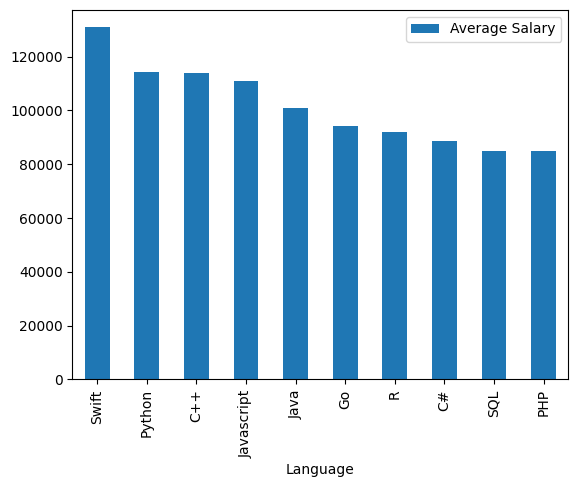

In [7]:
df.plot(kind='bar', y='Average Salary', x='Language')

In [8]:
df.to_csv('popular_language.csv', header=False, index=False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
